In [1]:
import xarray as xr

In [2]:
import glob

In [3]:
ccsiro = xr.open_mfdataset(glob.glob('../../../Descargas/gridded/*.nc'))

In [5]:
ccsiro

<xarray.Dataset>
Dimensions:    (latitude: 1, longitude: 1, time: 10944)
Coordinates:
  * longitude  (longitude) float32 356.4
  * latitude   (latitude) float32 44.0
  * time       (time) datetime64[ns] 2020-01-01 ... 2021-03-31T23:00:00.00001...
Data variables:
    MAPSTA     (time, latitude, longitude) int16 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    dpt        (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    uwnd       (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    vwnd       (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    ice        (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    hs         (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    lm         (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    t02        (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    t0m1       (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    t01        (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    fp         (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    dir        (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    spr        (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    dp         (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    phs0       (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    phs1       (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    phs2       (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    phs3       (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    ptp0       (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    ptp1       (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    ptp2       (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    ptp3       (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    plp0       (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    plp1       (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    plp2       (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    plp3       (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    pdir0      (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    pdir1      (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    pdir2      (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    pdir3      (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    pspr0      (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    pspr1      (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    pspr2      (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    pspr3      (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    pws0       (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    pws1       (time, latitude, longitude) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    pws2       (time, latitude, longitude) float32 dask.array<chunk

In [7]:
import numpy as np
import pandas as pd

lat = 44.0
lon = 356.4

print('Creating and saving the dataframe...')

csiro_sel = ccsiro.sel(latitude=lat).sel(longitude=lon)

csiro = pd.DataFrame({'Hs':         csiro_sel.hs.values,
                      'Tm_01':      csiro_sel.t01.values,
                      'Tm_02':      csiro_sel.t02.values,
                      'Tp':         1/csiro_sel.fp.values,
                      'DirM':       csiro_sel.dir.values,
                      'DirP':       csiro_sel.dp.values,
                      'Spr':        csiro_sel.spr.values,
                      'Nwp':        csiro_sel.pnr.values,
                      'U10':        csiro_sel.uwnd.values,
                      'V10':        csiro_sel.vwnd.values,
                      'Hsea':       csiro_sel.phs0.values,
                      'Hswell1':    csiro_sel.phs1.values,
                      'Hswell2':    csiro_sel.phs2.values,
                      'Hswell3':    csiro_sel.phs3.values,
                      'Tpsea':      csiro_sel.ptp0.values,
                      'Tpswell1':   csiro_sel.ptp1.values,
                      'Tpswell2':   csiro_sel.ptp2.values,
                      'Tpswell3':   csiro_sel.ptp3.values,
                      'Dirsea':     csiro_sel.pdir0.values,
                      'Dirswell1':  csiro_sel.pdir1.values,
                      'Dirswell2':  csiro_sel.pdir2.values,
                      'Dirswell3':  csiro_sel.pdir3.values,
                      'Sprsea':     csiro_sel.pspr0.values,
                      'Sprswell1':  csiro_sel.pspr1.values,
                      'Sprswell2':  csiro_sel.pspr2.values,
                      'Sprswell3':  csiro_sel.pspr3.values},
                     index = csiro_sel.time.values)

csiro['Hsea'].iloc[np.isnan(csiro['Hsea'].values)] = 0.0
csiro['Hswell1'].iloc[np.isnan(csiro['Hswell1'].values)] = 0.0
csiro['Hswell2'].iloc[np.isnan(csiro['Hswell2'].values)] = 0.0
csiro['Hswell3'].iloc[np.isnan(csiro['Hswell3'].values)] = 0.0
csiro['Hs_cal'] = np.sqrt(csiro['Hsea']**2 + csiro['Hswell1']**2 + csiro['Hswell2']**2 + csiro['Hswell3']**2)
csiro.index = csiro.index.round('H')

csiro_total = csiro

# WIND additional COMPONENTS
WIND = np.zeros(len(csiro_total))
DIRW = np.zeros(len(csiro_total))
for w in range(len(csiro_total)):
    h = csiro_total['U10'].iloc[w]
    v = csiro_total['V10'].iloc[w]
    if (h>=0 and v>=0):
        h = abs(h)
        v = abs(v)
        wind = np.sqrt(h**2 + v**2)
        dirW = np.arcsin(v/wind)*180/np.pi
        WIND[w] = wind
        DIRW[w] = 90 - dirW
    elif (h>=0 and v<=0):
        h = abs(h)
        v = abs(v)
        wind = np.sqrt(h**2 + v**2)
        dirW = np.arcsin(v/wind)*180/np.pi
        WIND[w] = wind
        DIRW[w] = 90 + dirW
    elif (h<=0 and v<=0):
        h = abs(h)
        v = abs(v)
        wind = np.sqrt(h**2 + v**2)
        dirW = np.arcsin(v/wind)*180/np.pi
        WIND[w] = wind
        DIRW[w] = 180 + (90 - dirW)
    elif (h<=0 and v>=0):
        h = abs(h)
        v = abs(v)
        wind = np.sqrt(h**2 + v**2)
        dirW = np.arcsin(v/wind)*180/np.pi
        WIND[w] = wind
        DIRW[w] = 270 + dirW
    else:
        WIND[w] = np.nan
        DIRW[w] = np.nan
DIRW = DIRW + 180
DIRW[np.where(DIRW>360)[0]] = DIRW[np.where(DIRW>360)[0]] - 360

csiro_total.insert(10, 'W', WIND)
csiro_total.insert(11, 'DirW', DIRW)


Creating and saving the dataframe...


In [9]:
csiro_total.columns

Index(['Hs', 'Tm_01', 'Tm_02', 'Tp', 'DirM', 'DirP', 'Spr', 'Nwp', 'U10',
       'V10', 'W', 'DirW', 'Hsea', 'Hswell1', 'Hswell2', 'Hswell3', 'Tpsea',
       'Tpswell1', 'Tpswell2', 'Tpswell3', 'Dirsea', 'Dirswell1', 'Dirswell2',
       'Dirswell3', 'Sprsea', 'Sprswell1', 'Sprswell2', 'Sprswell3', 'Hs_cal'],
      dtype='object')

In [10]:
csiro_total.to_pickle('csiro_2021_manu.pkl')

In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import cartopy.crs as ccrs

In [2]:
import glob

In [22]:
data = xr.open_mfdataset(
    sorted(glob.glob('../../../Descargas/wind_javi/wind_javi/wnd0-30mb*.nc'))
)

In [11]:
glob.glob('../../../Descargas/wind_javi/wind_javi/*201305*')

['../../../Descargas/wind_javi/wind_javi/wnd1000.cdas1.201305.grb2.nc',
 '../../../Descargas/wind_javi/wind_javi/wnd700.cdas1.201305.grb2.nc',
 '../../../Descargas/wind_javi/wind_javi/wnd0-30mb.cdas1.201305.grb2.nc',
 '../../../Descargas/wind_javi/wind_javi/wnd500.cdas1.201305.grb2.nc',
 '../../../Descargas/wind_javi/wind_javi/wnd850.cdas1.201305.grb2.nc',
 '../../../Descargas/wind_javi/wind_javi/wnd200.cdas1.201305.grb2.nc']

In [20]:
%matplotlib
data1.isel(lat=2,lon=2).U_GRD_L100.plot(alpha=0.7)
data2.isel(lat=2,lon=2).U_GRD_Y108.plot(alpha=0.7)

Using matplotlib backend: Qt5Agg


In [27]:
data.time.plot.hist()

(array([3799., 3798., 3799., 3798., 3798., 3799., 3798., 3799., 3798.,
        3799.]),
 array([727564. , 728513.6, 729463.2, 730412.8, 731362.4, 732312. ,
        733261.6, 734211.2, 735160.8, 736110.4, 737060. ]),
 <a list of 10 Patch objects>)

In [25]:
data.to_netcdf('CFSR_WIND_1H_1993_2019.nc')

In [4]:
ini_lon, end_lon = 160, 190
ini_lat, end_lat = -30, -50

In [24]:
era_interim = np.meshgrid(np.arange(ini_lon,end_lon,0.63*5),np.arange(end_lat,ini_lat,0.63*5))
era_5 = np.meshgrid(np.arange(ini_lon,end_lon,0.25*5),np.arange(end_lat,ini_lat,0.25*5))
cfsr = np.meshgrid(np.arange(ini_lon,end_lon,0.3*5),np.arange(end_lat,ini_lat,0.3*5))

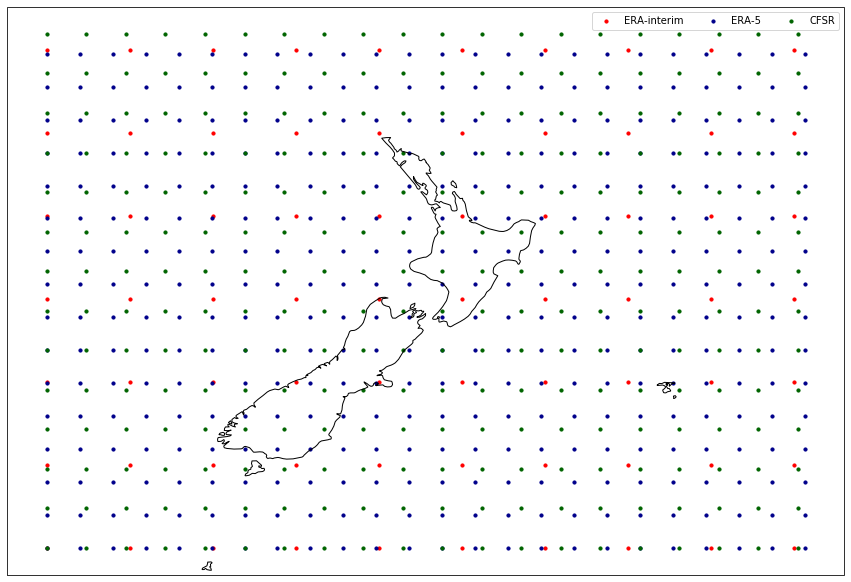

In [25]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.coastlines()
ax.scatter(era_interim[0].reshape(-1),era_interim[1].reshape(-1),s=10,
           transform=ccrs.PlateCarree(),c='red',label='ERA-interim')
ax.scatter(era_5[0].reshape(-1),era_5[1].reshape(-1),s=10,
           transform=ccrs.PlateCarree(),c='darkblue',label='ERA-5')
ax.scatter(cfsr[0].reshape(-1),cfsr[1].reshape(-1),s=10,
           transform=ccrs.PlateCarree(),c='darkgreen',label='CFSR')
ax.legend(ncol=3)

In [16]:
era_interim[0]

array([[160.  , 160.63, 161.26, ..., 188.35, 188.98, 189.61],
       [160.  , 160.63, 161.26, ..., 188.35, 188.98, 189.61],
       [160.  , 160.63, 161.26, ..., 188.35, 188.98, 189.61],
       ...,
       [160.  , 160.63, 161.26, ..., 188.35, 188.98, 189.61],
       [160.  , 160.63, 161.26, ..., 188.35, 188.98, 189.61],
       [160.  , 160.63, 161.26, ..., 188.35, 188.98, 189.61]])

In [ ]:
#---------------------------------------------------------------------------#
# PARAMETERS TO TUNE THE ALGORITHM
# Definition:
#   iseed  = the random seed number (for repetetive testing purpose;
#            pos integers)
#   iniflg = flag for initial parameter array (=1, included it in initial
#            population; otherwise, not included)
#   ngs =    number of complexes (sub-populations)
#   peps =   value of NORMALIZED GEOMETRIC RANGE needed for convergence
#   maxn =   maximum number of function evaluations allowed during 
#            optimization
#   kstop =  maximum number of evolution loops before convergency
#   pcento = the percentage change allowed in kstop loops before 
#            convergency
# Values:
iseed   = random.randint(0,10000)
iniflg  = 0
ngs     = 6
peps    = 0.01
maxn    = 3000
kstop   = 30
pcento  = 0.01
#------------------------------------------------------------------------#


# selection of the parameters for sceua
bl = np.ones(5) * -0.2
bu = np.ones(5) * +0.2
x0 = np.ones(5) * 0.01

# call the algorithm, that returns best likelihood and parameters
bestx, bestf, BESTX, BESTF, ICALL = sceua(x0,bl,bu,maxn,kstop,pcento,peps,
                                          ngs,iseed,iniflg,
                                          data=data)

# return parameters, likelihood and AIC in this iteration
print('\n \n Parameters: ', bestx)
print('\n Likelihood: ', bestf)
print('\n')
# plot adjust
plot_parameters(BESTX, BESTF, ICALL)